In [1]:
import tensorflow as tf
import cv2, os, glob
import matplotlib.pyplot as plt
import sys
import numpy as np

import keras
from Subpixel import Subpixel
from keras.preprocessing.image import img_to_array,load_img,array_to_img
from skimage.transform import pyramid_reduce 

In [2]:
model = keras.models.load_model('models\model.h5',custom_objects={'Subpixel':Subpixel})

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 44, 44, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 44, 44, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 16)        4624      
_________________________________________________________________
subpixel (Subpixel)          (None, 176, 176, 3)       6960      
_________________________________________________________________
activation (Activation)      (None, 176, 176, 3)       0     

In [4]:

"""
np.save('test_result/testing',ndarray)
testing = np.load('test_result/testing.npy')
"""

"\nnp.save('test_result/testing',ndarray)\ntesting = np.load('test_result/testing.npy')\n"

<class 'numpy.ndarray'>


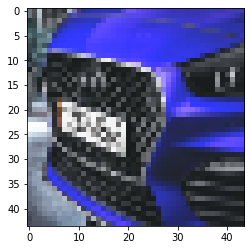

In [8]:
img_sample = cv2.imread('testimg\\test2.jpg')

h, w, _ = img_sample.shape


resized_sample = pyramid_reduce(img_sample, downscale=4,multichannel=True)

crop = cv2.resize(resized_sample,dsize=(44,44))
print(type(crop))
plt.imshow(crop)

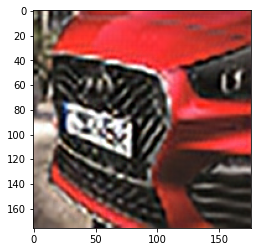

In [9]:
result = model.predict(crop.reshape(1,44,44,3))
result = np.clip(result.reshape((176, 176, 3)), 0, 1)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)